## # Introduction
<p><img src="static/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

In [31]:
# Libraries used
import pandas as pd

# Importing data: lego_sets.csv
lego = pd.read_csv('datasets/lego_sets.csv')

# Brief inspection

# A random sample to quickly gauge what the data is all about
display(lego.sample(n=5))
# Data dictionary to understand the type of data we are dealing pre-cleaning
lego.dtypes

,set_num,name,year,num_parts,theme_name,parent_theme
8115,75021-1,Republic Gunship,2013,NaN,Star Wars Episode 2,Star Wars
2487,3316-10,"Advent Calendar 2012, Friends (Day 9) - Breakfast",2012,NaN,Friends,Seasonal
11445,K7775-1,Complete Aqua Raiders Collection,2007,6.0,Aquaraiders II,Aquazone
3722,41528-1,Niksput,2015,62.0,Series 4,Mixels
9723,851005-1,LEGO® Super Heroes Batgirl Key Chain,2014,NaN,Key Chain,Gear


set_num          object
name             object
year              int64
num_parts       float64
theme_name       object
parent_theme     object
dtype: object

In [32]:
# Importing data: parent_themes.csv
themes = pd.read_csv('datasets/parent_themes.csv')

# Brief inspection
display(themes.sample(n=5))
themes.dtypes

,id,name,is_licensed
56,425,Legoland Parks,False
75,480,Znap,False
72,474,Vikings,False
107,606,Angry Birds,True
24,276,Sculptures,False


id              int64
name           object
is_licensed      bool
dtype: object

# Brief analysis - Plan of Action

**We have the following questions:**

1. What percentage of all licensed sets ever released were Star Wars themed? Save your answer as a variable the_force in the form of an integer (e.g. 25).

2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)? Save your answer as a variable new_era in the form of an integer (e.g. 2012).

**Considerations:**
- Data is not necessarily clean

**Proposals(questions or initial hypotheses):**

1. We want all licensed sets that are Star Wars themed. First of all, what is X themed? Is it a sub-theme or a parent theme? Secondly, is there a set that was not released? or a set that is not licensed?
2. Similar to the first question. One thing: the question uses year in the singular, but is it really one?

**Some initial ideas:**
- I believe Star Wars is a parent theme, based on this initial introduction and the data seen so far(Indiana Jones is a parent theme, for example)
- I believe there are more than one year in which Star Wars was not the most popular licensed theme
- The set is either licensed or not from the description of the data and the initial introduction(it contains is_licensed in parent themes dataset)
- There are missing/invalid data in columns set_num and num_parts in lego dataframe
- There are no missing/invalid data in the themes dataframe

In [33]:
# Under the assumption that the data is not clean
# we will use a string similarity index just in case
from difflib import SequenceMatcher
# Verification of some initial hypotheses

# Using SequenceMatcher for string similarity to match star wars,
# Assuming strings have leading and trailing spaces and
# standardizing strings by making them lower case
match_df = themes['name'].\
str.strip().\
str.lower().\
apply(lambda x: SequenceMatcher(None,'star wars',x).ratio())

#Verifying if Star Wars is a parent theme and it's a unique theme by selecting rows with similarity index above 0.5 threshold 
themes[match_df>=0.5]

,id,name,is_licensed
7,158,Star Wars,True


Looks like Star Wars is a parent theme which fits with my initial hypothesis. We can also see that it's licensed as we thought, but it's not exactly as we said in our initial hypothesis. The theme is what is licensed, not the set.
We can now start our progress in attempting to solve the leftover questions/hypotheses.

In [34]:
# Analyzing duplicated/invalid data
print(f'''theme dataframe:
duplicated: {themes.duplicated().sum()}
duplicated(id): {themes.duplicated(subset='id').sum()}
duplicated(name): {themes.duplicated(subset='name').sum()}''')

theme dataframe:
duplicated: 0
duplicated(id): 0
duplicated(name): 0


In [35]:
themes.isna().sum()

id             0
name           0
is_licensed    0
dtype: int64

No missing values for themes dataframe as we assumed and it looks like there are no duplicated rows and no duplicated id and name fields. Do they make sense though?

In [36]:
sorted_id = themes['id'].sort_values()
sorted_id

0        1
1       22
2       50
3      112
4      126
      ... 
106    605
107    606
108    607
109    608
110    610
Name: id, Length: 111, dtype: int64

<AxesSubplot:>

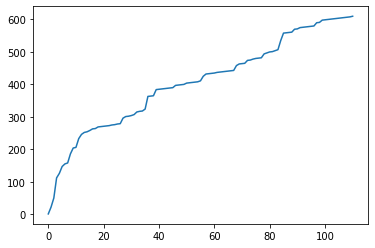

In [37]:
sorted_id.plot()

Nothing too abnormal. Looks like there are some missing id or they are reserved for future themes.

In [38]:
licensed_themes = themes['is_licensed']
themes[~licensed_themes].head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


We can also see that there are themes that are not licensed as we thought. Let's analyze the lego dataframe.

In [39]:
lego.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [40]:
# Comparing the number of unique set_num with the number of rows
print('Number of rows in the lego dataframe:\t',lego.shape[0],'\nNumber of unique set_num: \t\t',lego['set_num'].nunique())

Number of rows in the lego dataframe:	 11986 
Number of unique set_num: 		 11833


As we thought given the description of the data, there are duplicated/invalid set_num entries. Otherwise, they would be equal.

In [41]:
print('Number of missing set_num: \t\t\t',lego['set_num'].isna().sum(),\
      '\nNumber of unique set_num + missing set_num: \t',lego['set_num'].isna().sum()+lego['set_num'].nunique(),\
      '\nNumber of rows in the lego dataframe: \t\t',lego.shape[0])

Number of missing set_num: 			 153 
Number of unique set_num + missing set_num: 	 11986 
Number of rows in the lego dataframe: 		 11986


We can now say that set_num only has missing entries rather than duplicated entries. Still, it's worth checking.

In [42]:
lego[lego['set_num'].duplicated()]['set_num'].value_counts(dropna=False)

NaN    152
Name: set_num, dtype: int64

For all 'duplicated' set_num, all of them are NaN. Or better, they are missing. Let's check them

In [43]:
lego[lego['set_num'].isna()].head()

,set_num,name,year,num_parts,theme_name,parent_theme
11833,NaN,NaN,2017,347.0,NaN,Disney Princess
11834,NaN,NaN,2016,70.0,NaN,Disney Princess
11835,NaN,NaN,2016,NaN,NaN,Disney Princess
11836,NaN,NaN,2017,304.0,NaN,Super Heroes
11837,NaN,NaN,2017,196.0,NaN,Super Heroes


From this inspection, we can see that they have a valid year, num_parts and parent_theme. Are they duplicated from another row? Let's check it.

In [44]:
dupes = lego.duplicated(subset=['year','num_parts','parent_theme'])
dupes.sum()

5744

In [45]:
lego[dupes]['set_num'].isna().sum()

153

Hard to say, but from all duplicated tuples (year,num_parts,parent_theme). We can see all of the missing set_num rows. This means that there are rows with valid set_num with the same tuple as the ones with missing set_num. In fact, let's verify for some of them:

In [46]:
lego[(lego['year']==2017) & (lego['num_parts']==347) & (lego['parent_theme']=='Disney Princess')]

,set_num,name,year,num_parts,theme_name,parent_theme
3579,41146-1,Cinderella's Enchanted Evening,2017,347.0,Disney Princess,Disney Princess
11833,NaN,NaN,2017,347.0,NaN,Disney Princess


In [47]:
lego[(lego['year']==2016) & (lego['num_parts']==70) & (lego['parent_theme']=='Disney Princess')]

,set_num,name,year,num_parts,theme_name,parent_theme
3507,41069-1,Treasure's Day at the Pool,2016,70.0,Disney Princess,Disney Princess
11834,NaN,NaN,2016,70.0,NaN,Disney Princess


Not a definitive proof, but it looks like. From now on, let's suppose they are duplicated. With this, it's better if we exclude them from our analysis.

In [48]:
# Saving original dataframe in case we need it
original_lego = lego.copy()

In [49]:
# Dropping possible duplication
lego.dropna(subset=['set_num'], inplace=True)
lego['set_num'].isna().sum()

0

What about num_parts? From this operation, are they also missing?

In [50]:
lego['num_parts'].isna().sum()

4998

Yes. Since they represent the number of parts, do missing values represent zero parts? If they are used like this, we should expect no zeros.

In [51]:
lego[lego['num_parts'] == 0].head()

,set_num,name,year,num_parts,theme_name,parent_theme
354,10623-1,Basic Bricks – Large,2015,0.0,Basic Set,Duplo
646,11995-1,Hero Recon Team,2011,0.0,Hero Factory,Hero Factory
1639,221-1,Idea Book #1,1973,0.0,Books,Books
1688,226-2,Idea Book,1981,0.0,Books,Books
1715,238-3,Lego System Idea Book no. 1,1962,0.0,Books,Books


Not really, but they can mean the same thing. Still, they are not essential for our project's questions. We can, as discussed before, ignore missing values for this field. Now what about unreleased sets?

In [52]:
print(f"""Range of year for lego dataframe: {lego['year'].min()} - {lego['year'].max()}""")

Range of year for lego dataframe: 1950 - 2017


Our lego dataframe ranges from 1950 to 2017. As of today, they are all supposedly released.

# Analysis' remarks

**We have the following questions:**

1. What percentage of all licensed sets ever released were Star Wars themed? Save your answer as a variable the_force in the form of an integer (e.g. 25).

2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)? Save your answer as a variable new_era in the form of an integer (e.g. 2012).

**Considerations:**
- Data is not necessarily clean

**Proposals(questions or initial hypotheses):**

1. We want all licensed sets that are Star Wars themed. First of all, what is X themed? Is it a sub-theme or a parent theme? Secondly, is there a set that was not released? or a set that is not licensed? **Answer:** *Star Wars themed means, for this data, a set with the Star Wars parent theme. All sets are released as of today. There are sets that aren't licensed, as in, there are themes that aren't licensed.*
2. Similar to the first question. One thing: the question uses year in the singular, but is it really one? **Answer:** *To answer this, we will need to answer our project's questions, so no answer to this yet*

**Some initial ideas:**
- I believe Star Wars is a parent theme, based on this initial introduction and the data seen so far(Indiana Jones is a parent theme, for example) ✅
- I believe there are more than one year in which Star Wars was not the most popular licensed theme
- The set is either licensed or not from the description of the data and the initial introduction(it contains is_licensed in parent themes dataset) ✅
- There are missing/invalid data in columns set_num and num_parts in lego dataframe ✅
- There are no missing/invalid data in the themes dataframe ✅

**Summary:**
- I verified some of the initial ideas, explored the data and understood the questions a bit better
- Lego dataframe was cleaned minimally to eliminate possible duplication of rows which is relevant to answer our questions correctly


Now, let's determine if data should be cleaned more before proceeding or if there are any data integrity issues to be resolved. Should we assume that all sets' parent theme is in the themes dataframe? Let's verify

In [53]:
len(lego[~lego['parent_theme'].isin(themes['name'])])

0

Then we can safely assume that for all sets, they have a corresponding theme that we can associate in themes dataframe. Should we expect multiple sets for each theme? My initial assumption is yes, but let's verify it too.

In [54]:
assoc_count = themes['name'].apply(lambda x: (lego['parent_theme']==x).sum())
pd.Series(data=assoc_count.values, index=themes['name']).sort_values(ascending=False)

name
Town             1116
Seasonal          928
Star Wars         609
Technic           536
Service Packs     456
                 ... 
Universe            1
Ghostbusters        1
Disney              1
Quatro              0
Primo               0
Length: 111, dtype: int64

From this result we can determine that a theme is associated with many sets, but there are themes that do not have any associated set. Let's observe those that do not have any associated set:

In [55]:
themes[assoc_count==0]

,id,name,is_licensed
64,440,Primo,False
65,441,Quatro,False


They look to be themes for children age 1 to 3. They are also sequentially related by the id. Overall, that's okay. Maybe we are missing data for the lego dataframe or they were replaced by another theme. We can conclude that lego-themes relationship is many-to-one, with 0 being included in N.

In [56]:
# Left join should be used, but since we have many-to-one, natural join should give the same result
lego_themes = lego.merge(themes.rename(columns={'name':'parent_theme'}), on = 'parent_theme', validate = 'many_to_one')
# Sanity check comparing number of rows in lego dataframe with the merged dataframe, they should be equal
print('lego dataframe(row #):\t\t',len(lego),'\nlego-themes merge(row #):\t',len(lego_themes))

lego dataframe(row #):		 11833 
lego-themes merge(row #):	 11833


Looks alright. The validation was successful as we expected. We can now try to answer the first question.

In [57]:
# Useful conditions
licensed_sets = lego_themes['is_licensed'] == True
star_wars_themed = lego_themes['parent_theme'] == 'Star Wars'

In [58]:
# Question 1
the_force = int(len(lego_themes[licensed_sets & star_wars_themed])/len(lego_themes[licensed_sets])*100)
the_force

51

In [59]:
# Question 2
# For this question, we are approximating popularity with the number of sets produced by Lego
popularity_ranking_by_year = lego_themes.groupby(['year','parent_theme','is_licensed']).size().rename('count').\
                            sort_values(ascending=False).sort_index(level='year',sort_remaining=False)
licensed_popularity_ranking_by_year = popularity_ranking_by_year.loc[:,:,True]
most_popular_licensed_by_year = licensed_popularity_ranking_by_year.reset_index().groupby('year').first()
most_popular_licensed_by_year

,parent_theme,count
year,,
1999,Star Wars,13
2000,Star Wars,26
2001,Star Wars,14
2002,Star Wars,28
2003,Star Wars,32
2004,Star Wars,20
2005,Star Wars,28
2006,Star Wars,11
2007,Star Wars,16


In [60]:
# Or directly:
new_era = most_popular_licensed_by_year.query('parent_theme != "Star Wars"').index[0]
new_era

2017

# Conclusion

**We have the following questions:**

1. What percentage of all licensed sets ever released were Star Wars themed? Save your answer as a variable the_force in the form of an integer (e.g. 25). **Answer:** *51%*

2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)? Save your answer as a variable new_era in the form of an integer (e.g. 2012). **Answer:** *Looks like it was just one year, the year 2017*
